In [1]:
import anndata as ad

In [2]:
# 加载 .h5ad 文件
adata_reduced = ad.read_h5ad('../data/adata_reduced_31_may.h5ad')
zheng68k = ad.read_h5ad('../data/Zheng68K.h5ad')
s4d8_clustered = ad.read_h5ad('/work/09735/yichao/ls6/common/s4d8_clustered.h5ad')

In [3]:
print("\ns4d8_clustered shape:", s4d8_clustered.shape)
print("s4d8_clustered var names:", s4d8_clustered.var_names[:5])  # 显示前5个变量名
print("s4d8_clustered obs names:", s4d8_clustered.obs_names[:5])  # 显示前5个观察名


s4d8_clustered shape: (9370, 31208)
s4d8_clustered var names: Index(['AL627309.1', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL669831.2'], dtype='object')
s4d8_clustered obs names: Index(['TTCGCAACAATAATGG', 'ACTCGCGCAAACTGTT', 'GACTATTCATGTCGCG',
       'CTAATGTCATTGTTGG', 'TGACCAAGTAGACAAA'],
      dtype='object')


In [5]:
# 查看数据的基本信息
print("adata_reduced shape:", adata_reduced.shape)
print("adata_reduced var names:", adata_reduced.var_names[:5])  # 显示前5个变量名
print("adata_reduced obs names:", adata_reduced.obs_names[:5])  # 显示前5个观察名

adata_reduced shape: (11984, 3594)
adata_reduced var names: Index(['Slco5a1', 'Eya1', 'Trpa1', 'Sbspon', 'Jph1'], dtype='object', name='Gene')
adata_reduced obs names: Index(['SRR12396124:AACTCCCAGACGACGTx-0', 'SRR12396124:AACACGTGTCAGCTATx-0',
       'SRR12396124:AACGTTGCACCGAATTx-0', 'SRR12396124:AAAGCAACAGCCTATAx-0',
       'SRR12396124:AACGTTGTCATGTAGCx-0'],
      dtype='object', name='CellID')


In [6]:
print("\nzheng68k shape:", zheng68k.shape)
print("zheng68k var names:", zheng68k.var_names[:5])  # 显示前5个变量名
print("zheng68k obs names:", zheng68k.obs_names[:5])  # 显示前5个观察名


zheng68k shape: (68450, 16906)
zheng68k var names: Index(['A1BG', 'A1CF', 'A2ML1', 'A2M', 'A4GALT'], dtype='object')
zheng68k obs names: Index(['AAACATACACCCAA-1', 'AAACATACCCCTCA-1', 'AAACATACCGGAGA-1',
       'AAACATACTAACCG-1', 'AAACATACTCTTCA-1'],
      dtype='object')


In [7]:
# 你还可以使用以下方法查看数据集的更多详细信息
print("\nadata_reduced 数据集的信息:")
print(adata_reduced)


adata_reduced 数据集的信息:
AnnData object with n_obs × n_vars = 11984 × 3594
    obs: 'wt_ko', 'leiden', 'dpt_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    obsm: 'T_fwd_umap', 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'


In [8]:
print("\nzheng68k 数据集的信息:")
print(zheng68k)


zheng68k 数据集的信息:
AnnData object with n_obs × n_vars = 68450 × 16906
    obs: 'TSNE.1', 'TSNE.2', 'celltype', 'n_genes'
    uns: 'log1p'


In [4]:
print("\ns4d8_clustered 数据集的信息:")
print(s4d8_clustered)


s4d8_clustered 数据集的信息:
AnnData object with n_obs × n_vars = 9370 × 31208
    obs: 'site', 'donor', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'DF_score', 'batch', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant'
    layers: 'scran_normalization'


In [9]:
# 查看两个数据集的基本信息
print(f"adata_reduced shape: {adata_reduced.shape}")
print(f"zheng68k shape: {zheng68k.shape}")

adata_reduced shape: (11984, 3594)
zheng68k shape: (68450, 16906)


In [6]:
# 比较维度
print(f"adata_reduced 维度: {adata_reduced.shape}")
print(f"s4d8_clustered 维度: {s4d8_clustered.shape}")

# 比较变量名
common_vars = set(adata_reduced.var_names).intersection(set(s4d8_clustered.var_names))
unique_vars_reduced = set(adata_reduced.var_names) - common_vars
unique_vars_s4d8_clustered = set(s4d8_clustered.var_names) - common_vars

print(f"共有的变量数量: {len(common_vars)}")
print(f"adata_reduced 独有的变量数量: {len(unique_vars_reduced)}")
print(f"s4d8_clustered 独有的变量数量: {len(unique_vars_s4d8_clustered)}")

# 打印共有的变量
print("共有的变量:")
print(common_vars)

# 比较观测名
common_obs = set(adata_reduced.obs_names).intersection(set(s4d8_clustered.obs_names))
unique_obs_reduced = set(adata_reduced.obs_names) - common_obs
unique_obs_s4d8_clustered = set(s4d8_clustered.obs_names) - common_obs

print(f"共有的观测数量: {len(common_obs)}")
print(f"adata_reduced 独有的观测数量: {len(unique_obs_reduced)}")
print(f"s4d8_clustered 独有的观测数量: {len(unique_obs_s4d8_clustered)}")

# 打印共有的观测
print("共有的观测:")
print(common_obs)

adata_reduced 维度: (11984, 3594)
s4d8_clustered 维度: (9370, 31208)
共有的变量数量: 1
adata_reduced 独有的变量数量: 3593
s4d8_clustered 独有的变量数量: 31207
共有的变量:
{'F9'}
共有的观测数量: 0
adata_reduced 独有的观测数量: 11984
s4d8_clustered 独有的观测数量: 9370
共有的观测:
set()


In [7]:
# 比较维度
print(f"zheng68k 维度: {zheng68k.shape}")
print(f"s4d8_clustered 维度: {s4d8_clustered.shape}")

# 比较变量名
common_vars = set(zheng68k.var_names).intersection(set(s4d8_clustered.var_names))
unique_vars_1 = set(zheng68k.var_names) - common_vars
unique_vars_2 = set(s4d8_clustered.var_names) - common_vars

print(f"共有的变量数量: {len(common_vars)}")
print(f"zheng68k 独有的变量数量: {len(unique_vars_1)}")
print(f"s4d8_clustered 独有的变量数量: {len(unique_vars_2)}")

# 打印共有的变量
print("共有的变量:")
print(common_vars)

# 比较观测名
common_obs = set(zheng68k.obs_names).intersection(set(s4d8_clustered.obs_names))
unique_obs_1 = set(zheng68k.obs_names) - common_obs
unique_obs_2 = set(s4d8_clustered.obs_names) - common_obs

print(f"共有的观测数量: {len(common_obs)}")
print(f"zheng68k 独有的观测数量: {len(unique_obs_1)}")
print(f"s4d8_clustered 独有的观测数量: {len(unique_obs_1)}")

# 打印共有的观测
print("共有的观测:")
print(common_obs)

zheng68k 维度: (68450, 16906)
s4d8_clustered 维度: (9370, 31208)
共有的变量数量: 16027
zheng68k 独有的变量数量: 879
s4d8_clustered 独有的变量数量: 15181
共有的变量:
{'CALB2', 'TRIM74', 'SLC6A3', 'MTIF3', 'NUTM2A', 'BEX2', 'ANKRD26', 'VENTX', 'CMC4', 'PPIL1', 'SMOC1', 'CCNA2', 'KCNJ15', 'FUT7', 'RBFA', 'BCL2L10', 'ZSCAN1', 'RAB40B', 'ELN', 'SNX10', 'NELL1', 'NCAPG2', 'PXN', 'CHRNG', 'TRAK2', 'CEP57L1', 'SLC7A1', 'ETAA1', 'TTPAL', 'FBXO22', 'DHX37', 'PIK3C2B', 'GNGT2', 'SMYD4', 'SH3PXD2A', 'CD80', 'IER3IP1', 'SCN9A', 'RNF38', 'AKT1', 'MORF4L2', 'LRTOMT', 'NAA50', 'TPPP3', 'ADAMTSL2', 'YWHAZ', 'PRKCA', 'AGAP1', 'CREBL2', 'HSD11B1', 'SNAP91', 'TOM1', 'PEX16', 'TPRKB', 'ADAMTS2', 'NMI', 'ZNF669', 'ADAT2', 'BARD1', 'BANK1', 'ARL4C', 'SHISA2', 'BCL3', 'KIAA1217', 'PML', 'SLIRP', 'TOE1', 'RHBDD1', 'SLC25A37', 'HELQ', 'KRT81', 'HSF2', 'IBTK', 'MRPL42', 'ZNF133', 'C15orf48', 'DRAP1', 'SCARF1', 'USP26', 'ABRACL', 'ZNF337', 'AMER2', 'PNP', 'ATG13', 'SLC43A2', 'PKDCC', 'FXN', 'DNAJB13', 'NPEPL1', 'JADE2', 'TUBB4B', 'GRAP', 'SUL

In [10]:
# 比较维度
print(f"adata_reduced 维度: {adata_reduced.shape}")
print(f"zheng68k 维度: {zheng68k.shape}")

# 比较变量名
common_vars = set(adata_reduced.var_names).intersection(set(zheng68k.var_names))
unique_vars_reduced = set(adata_reduced.var_names) - common_vars
unique_vars_zheng68k = set(zheng68k.var_names) - common_vars

print(f"共有的变量数量: {len(common_vars)}")
print(f"adata_reduced 独有的变量数量: {len(unique_vars_reduced)}")
print(f"zheng68k 独有的变量数量: {len(unique_vars_zheng68k)}")

# 打印共有的变量
print("共有的变量:")
print(common_vars)

# 比较观测名
common_obs = set(adata_reduced.obs_names).intersection(set(zheng68k.obs_names))
unique_obs_reduced = set(adata_reduced.obs_names) - common_obs
unique_obs_zheng68k = set(zheng68k.obs_names) - common_obs

print(f"共有的观测数量: {len(common_obs)}")
print(f"adata_reduced 独有的观测数量: {len(unique_obs_reduced)}")
print(f"zheng68k 独有的观测数量: {len(unique_obs_zheng68k)}")

# 打印共有的观测
print("共有的观测:")
print(common_obs)

adata_reduced 维度: (11984, 3594)
zheng68k 维度: (68450, 16906)
共有的变量数量: 1
adata_reduced 独有的变量数量: 3593
zheng68k 独有的变量数量: 16905
共有的变量:
{'F9'}
共有的观测数量: 0
adata_reduced 独有的观测数量: 11984
zheng68k 独有的观测数量: 68450
共有的观测:
set()


In [11]:
import numpy as np
import pandas as pd

# 比较数据类型
print(f"adata_reduced 数据类型: {type(adata_reduced.X)}")
print(f"zheng68k 数据类型: {type(zheng68k.X)}")

# 比较稀疏矩阵的特性
if isinstance(adata_reduced.X, np.ndarray):
    print(f"adata_reduced 是一个密集矩阵，形状为 {adata_reduced.X.shape}")
else:
    print(f"adata_reduced 是一个稀疏矩阵，形状为 {adata_reduced.X.shape}，非零元素数量为 {adata_reduced.X.nnz}")

if isinstance(zheng68k.X, np.ndarray):
    print(f"zheng68k 是一个密集矩阵，形状为 {zheng68k.X.shape}")
else:
    print(f"zheng68k 是一个稀疏矩阵，形状为 {zheng68k.X.shape}，非零元素数量为 {zheng68k.X.nnz}")


adata_reduced 数据类型: <class 'numpy.ndarray'>
zheng68k 数据类型: <class 'scipy.sparse.csr.csr_matrix'>
adata_reduced 是一个密集矩阵，形状为 (11984, 3594)
zheng68k 是一个稀疏矩阵，形状为 (68450, 16906)，非零元素数量为 33627905


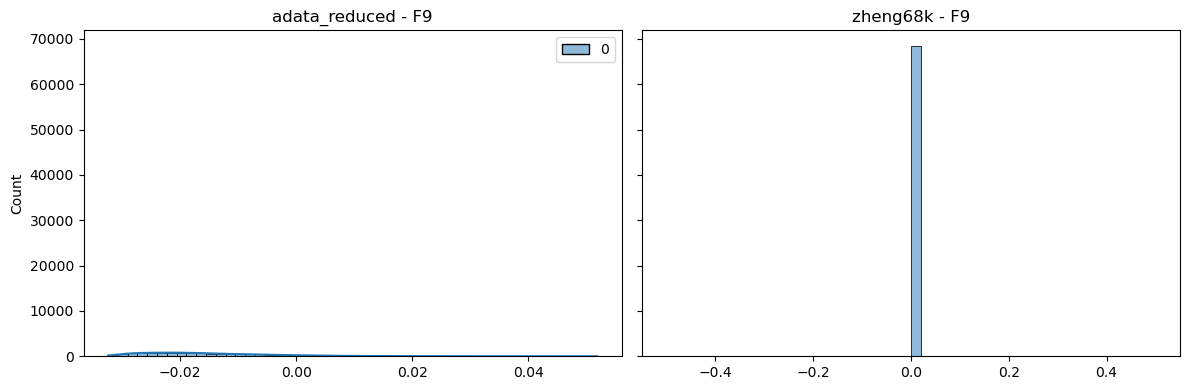

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# 比较两个数据集中共有变量的表达量分布
common_var = list(common_vars)[:10]  # 选择前10个共有变量进行比较

for var in common_var:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    sns.histplot(adata_reduced[:, var].X.A.flatten() if hasattr(adata_reduced[:, var].X, 'A') else adata_reduced[:, var].X, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"adata_reduced - {var}")
    
    sns.histplot(zheng68k[:, var].X.A.flatten() if hasattr(zheng68k[:, var].X, 'A') else zheng68k[:, var].X, bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f"zheng68k - {var}")
    
    plt.tight_layout()
    plt.show()


In [13]:
import anndata as ad
from scipy.sparse import issparse

# 加载 .h5ad 文件
adata_reduced = ad.read_h5ad('../data/adata_reduced_31_may.h5ad')
panglao_10000 = ad.read_h5ad('../data/panglao_10000.h5ad')
panglao_human = ad.read_h5ad('../data/panglao_human.h5ad')
zheng68k = ad.read_h5ad('../data/Zheng68K.h5ad')

# 定义一个函数来比较数据集的基本信息
def compare_datasets(datasets, names):
    for adata, name in zip(datasets, names):
        print(f"{name} 维度: {adata.shape}")
        print(f"{name} 变量名示例: {adata.var_names[:5]}")
        print(f"{name} 观测名示例: {adata.obs_names[:5]}")
        print(f"{name} 数据类型: {type(adata.X)}")
        if issparse(adata.X):
            print(f"{name} 是一个稀疏矩阵，非零元素数量: {adata.X.nnz}")
        print()

# 列出数据集和名称
datasets = [adata_reduced, panglao_10000, panglao_human, zheng68k]
names = ['adata_reduced', 'panglao_10000', 'panglao_human', 'zheng68k']

# 比较数据集的基本信息
compare_datasets(datasets, names)

# 比较变量和观测的共有和独有数量并打印前几位
for i in range(len(datasets)):
    for j in range(i + 1, len(datasets)):
        common_vars = set(datasets[i].var_names).intersection(set(datasets[j].var_names))
        unique_vars_i = set(datasets[i].var_names) - common_vars
        unique_vars_j = set(datasets[j].var_names) - common_vars

        common_obs = set(datasets[i].obs_names).intersection(set(datasets[j].obs_names))
        unique_obs_i = set(datasets[i].obs_names) - common_obs
        unique_obs_j = set(datasets[j].obs_names) - common_obs

        print(f"\n比较 {names[i]} 和 {names[j]}")
        print(f"共有的变量数量: {len(common_vars)}")
        print(f"{names[i]} 独有的变量数量: {len(unique_vars_i)}")
        print(f"{names[j]} 独有的变量数量: {len(unique_vars_j)}")

        print(f"共有的观测数量: {len(common_obs)}")
        print(f"{names[i]} 独有的观测数量: {len(unique_obs_i)}")
        print(f"{names[j]} 独有的观测数量: {len(unique_obs_j)}")
        
        # 打印前10个共有变量
        common_vars_list = list(common_vars)
        if len(common_vars_list) > 0:
            print(f"共有的变量前10位: {common_vars_list[:10]}")
        
        # 打印前10个共有观测
        common_obs_list = list(common_obs)
        if len(common_obs_list) > 0:
            print(f"共有的观测前10位: {common_obs_list[:10]}")


/work/09735/yichao/ls6/miniconda/envs/scbert/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


adata_reduced 维度: (11984, 3594)
adata_reduced 变量名示例: Index(['Slco5a1', 'Eya1', 'Trpa1', 'Sbspon', 'Jph1'], dtype='object', name='Gene')
adata_reduced 观测名示例: Index(['SRR12396124:AACTCCCAGACGACGTx-0', 'SRR12396124:AACACGTGTCAGCTATx-0',
       'SRR12396124:AACGTTGCACCGAATTx-0', 'SRR12396124:AAAGCAACAGCCTATAx-0',
       'SRR12396124:AACGTTGTCATGTAGCx-0'],
      dtype='object', name='CellID')
adata_reduced 数据类型: <class 'numpy.ndarray'>

panglao_10000 维度: (10000, 16906)
panglao_10000 变量名示例: Index(['A1BG', 'A1CF', 'A2ML1', 'A2M', 'A4GALT'], dtype='object')
panglao_10000 观测名示例: Index(['TACATCACGAGGAC', 'TACCATTGAACAGA', 'TACCATTGACCGAT', 'TACCATTGATGCTG',
       'TACCATTGCTTGTT'],
      dtype='object')
panglao_10000 数据类型: <class 'scipy.sparse.csr.csr_matrix'>
panglao_10000 是一个稀疏矩阵，非零元素数量: 12829666

panglao_human 维度: (1357593, 16906)
panglao_human 变量名示例: Index(['A1BG', 'A1CF', 'A2ML1', 'A2M', 'A4GALT'], dtype='object')
panglao_human 观测名示例: Index(['09cbFwH3', '0AdkBIuA', '0frx9XJU', '0NaEBg2H', 

In [14]:
import mygene

mg = mygene.MyGeneInfo()

# 定义基因列表
genes = ['GATAD2B', 'SV2B', 'HMGB2', 'TMPPE', 'CYP3A43', 'ANXA11', 'ACCS', 'ZNF460', 'MIDN', 'NME2']

# 查询基因信息
gene_info = mg.querymany(genes, scopes='symbol', fields='symbol,name,summary', species='human')

# 打印基因信息
for info in gene_info:
    print(f"基因符号: {info['symbol']}")
    print(f"基因名称: {info.get('name', 'N/A')}")
    print(f"基因摘要: {info.get('summary', 'N/A')}")

基因符号: GATAD2B
基因名称: GATA zinc finger domain containing 2B
基因摘要: This gene encodes a zinc finger protein transcriptional repressor. The encoded protein is part of the methyl-CpG-binding protein-1 complex, which represses gene expression by deacetylating methylated nucleosomes. Mutations in this gene are linked to intellectual disability and dysmorphic features associated with cognitive disability. [provided by RefSeq, Jun 2016].
基因符号: SV2B
基因名称: synaptic vesicle glycoprotein 2B
基因摘要: This gene encodes a member of the synaptic vesicle proteins 2 (SV2) family and major facilitator superfamily of proteins. This protein and other members of the family are localized to synaptic vesicles and may function in the regulation of vesicle trafficking and exocytosis. Studies in mice suggest that the encoded protein may act as a protein receptor for botulinum neurotoxin E in neurons, and that this protein may be important for the integrity of the glomerular filtration barrier. This gene shows reduced

In [30]:
# 加载 .h5ad 文件
adata_reduced = ad.read_h5ad('../data/adata_reduced_31_may.h5ad')
panglao_10000 = ad.read_h5ad('../data/panglao_10000.h5ad')
panglao_human = ad.read_h5ad('../data/panglao_human.h5ad')
zheng68k = ad.read_h5ad('../data/Zheng68K.h5ad')

# 定义一个函数来比较数据集的基本信息
def compare_datasets(datasets, names):
    for adata, name in zip(datasets, names):
        dataset_info = (f"{name} 维度: {adata.shape}, "
                        f"变量名示例: {adata.var_names[:5]}, "
                        f"观测名示例: {adata.obs_names[:5]}, "
                        f"数据类型: {type(adata.X)}")
        if issparse(adata.X):
            dataset_info += f", 是一个稀疏矩阵，非零元素数量: {adata.X.nnz}"
        print(dataset_info)

# 列出数据集和名称
datasets = [adata_reduced, panglao_10000, panglao_human, zheng68k]
names = ['adata_reduced', 'panglao_10000', 'panglao_human', 'zheng68k']

# 比较数据集的基本信息
compare_datasets(datasets, names)

# 查看具体的数据集的观测元数据和变量元数据
for adata, name in zip(datasets, names):
    print(f"\n{name} 观测元数据:")
    print(adata.obs.head(30).to_string(index=False))  # 打印前30行观测元数据

    print(f"\n{name} 变量元数据:")
    print(adata.var.head(30).to_string(index=False))  # 打印前30行变量元数据


/tmp/ipykernel_3013349/4008345472.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


/work/09735/yichao/ls6/miniconda/envs/scbert/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


adata_reduced 维度: (11984, 3594), 变量名示例: Index(['Slco5a1', 'Eya1', 'Trpa1', 'Sbspon', 'Jph1'], dtype='object', name='Gene'), 观测名示例: Index(['SRR12396124:AACTCCCAGACGACGTx-0', 'SRR12396124:AACACGTGTCAGCTATx-0', 'SRR12396124:AACGTTGCACCGAATTx-0', 'SRR12396124:AAAGCAACAGCCTATAx-0', 'SRR12396124:AACGTTGTCATGTAGCx-0'], dtype='object', name='CellID'), 数据类型: <class 'numpy.ndarray'>
panglao_10000 维度: (10000, 16906), 变量名示例: Index(['A1BG', 'A1CF', 'A2ML1', 'A2M', 'A4GALT'], dtype='object'), 观测名示例: Index(['TACATCACGAGGAC', 'TACCATTGAACAGA', 'TACCATTGACCGAT', 'TACCATTGATGCTG', 'TACCATTGCTTGTT'], dtype='object'), 数据类型: <class 'scipy.sparse.csr.csr_matrix'>, 是一个稀疏矩阵，非零元素数量: 12829666
panglao_human 维度: (1357593, 16906), 变量名示例: Index(['A1BG', 'A1CF', 'A2ML1', 'A2M', 'A4GALT'], dtype='object'), 观测名示例: Index(['09cbFwH3', '0AdkBIuA', '0frx9XJU', '0NaEBg2H', '0NQlCyEz'], dtype='object'), 数据类型: <class 'scipy.sparse.csr.csr_matrix'>, 是一个稀疏矩阵，非零元素数量: 1497547556
zheng68k 维度: (68450, 16906), 变量名示例: Index(['A1BG',

In [31]:
import anndata as ad
import pandas as pd
from scipy.sparse import issparse

# 加载数据集
adata_reduced = ad.read_h5ad('../data/adata_reduced_31_may.h5ad')
panglao_10000 = ad.read_h5ad('../data/panglao_10000.h5ad')
panglao_human = ad.read_h5ad('../data/panglao_human.h5ad')
zheng68k = ad.read_h5ad('../data/Zheng68K.h5ad')

# 找出共有变量（基因）
common_genes = set(adata_reduced.var_names).intersection(
    panglao_10000.var_names).intersection(
    panglao_human.var_names).intersection(
    zheng68k.var_names)

print(f"共有变量（基因）数量: {len(common_genes)}")

# 提取共有基因的数据
adata_reduced_common = adata_reduced[:, list(common_genes)]
panglao_10000_common = panglao_10000[:, list(common_genes)]
panglao_human_common = panglao_human[:, list(common_genes)]
zheng68k_common = zheng68k[:, list(common_genes)]

# 打印新的数据集信息
datasets_common = [adata_reduced_common, panglao_10000_common, panglao_human_common, zheng68k_common]
names_common = ['adata_reduced_common', 'panglao_10000_common', 'panglao_human_common', 'zheng68k_common']

def print_dataset_info(datasets, names):
    for adata, name in zip(datasets, names):
        print(f"{name} 维度: {adata.shape}")
        print(f"{name} 变量名示例: {adata.var_names[:5]}")
        print(f"{name} 观测名示例: {adata.obs_names[:5]}")
        print(f"{name} 数据类型: {type(adata.X)}")
        if issparse(adata.X):
            print(f"{name} 是一个稀疏矩阵，非零元素数量: {adata.X.nnz}")
        print()

print_dataset_info(datasets_common, names_common)


/work/09735/yichao/ls6/miniconda/envs/scbert/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


共有变量（基因）数量: 1
adata_reduced_common 维度: (11984, 1)
adata_reduced_common 变量名示例: Index(['F9'], dtype='object', name='Gene')
adata_reduced_common 观测名示例: Index(['SRR12396124:AACTCCCAGACGACGTx-0', 'SRR12396124:AACACGTGTCAGCTATx-0', 'SRR12396124:AACGTTGCACCGAATTx-0', 'SRR12396124:AAAGCAACAGCCTATAx-0', 'SRR12396124:AACGTTGTCATGTAGCx-0'], dtype='object', name='CellID')
adata_reduced_common 数据类型: <class 'anndata._core.views.ArrayView'>

panglao_10000_common 维度: (10000, 1)
panglao_10000_common 变量名示例: Index(['F9'], dtype='object')
panglao_10000_common 观测名示例: Index(['TACATCACGAGGAC', 'TACCATTGAACAGA', 'TACCATTGACCGAT', 'TACCATTGATGCTG', 'TACCATTGCTTGTT'], dtype='object')
panglao_10000_common 数据类型: <class 'anndata._core.views.SparseCSRView'>
panglao_10000_common 是一个稀疏矩阵，非零元素数量: 0

panglao_human_common 维度: (1357593, 1)
panglao_human_common 变量名示例: Index(['F9'], dtype='object')
panglao_human_common 观测名示例: Index(['09cbFwH3', '0AdkBIuA', '0frx9XJU', '0NaEBg2H', '0NQlCyEz'], dtype='object')
panglao_human_